In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# === Load dataset ===
dir = "D:\smstr 8\SKRIPSI TERBARU/"
df = pd.read_excel(dir + "Data Inflasi (3).xlsx")

In [3]:
df.head()

,Periode,Data_Inflasi
0,2025-05-01,0.0160
1,2025-04-01,0.0195
2,2025-03-01,0.0103
3,2025-02-01,-0.0009
4,2025-01-01,0.0076


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Periode       269 non-null    datetime64[ns]
 1   Data_Inflasi  269 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


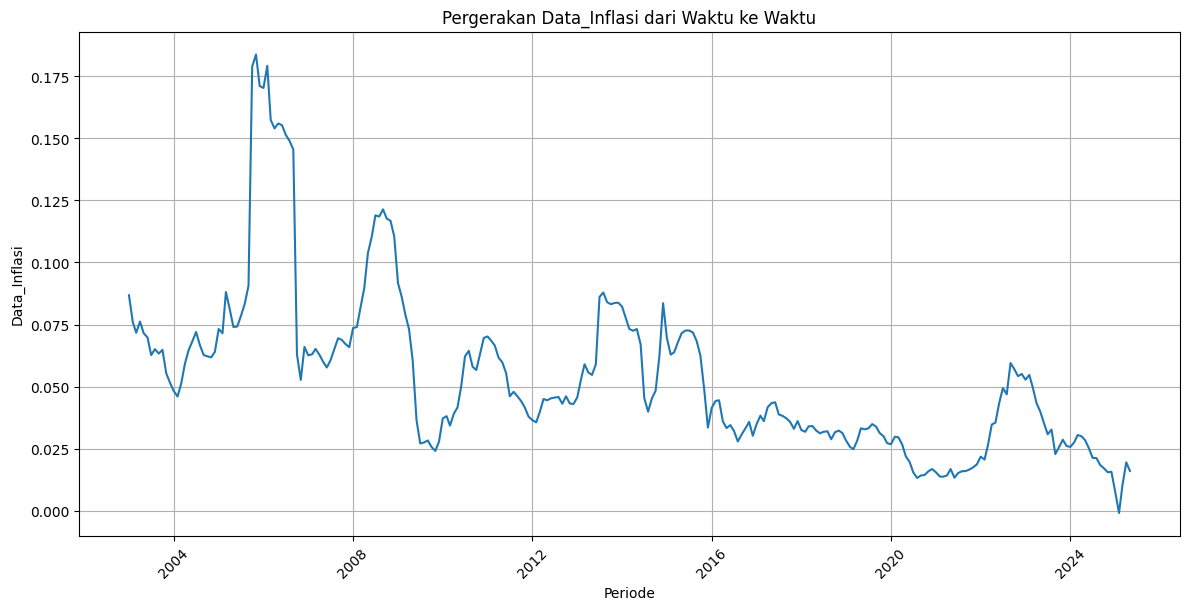

In [5]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Periode'], df['Data_Inflasi'], linestyle='-')
plt.title('Pergerakan Data_Inflasi dari Waktu ke Waktu')
plt.xlabel('Periode')
plt.ylabel('Data_Inflasi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [6]:
# === Normalisasi Min-Max ===
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Data_Inflasi']])
df['Data_Inflasi'] = data_scaled
df['Data_Inflasi'].head()

0    0.091500
1    0.110449
2    0.060639
3    0.000000
4    0.046021
Name: Data_Inflasi, dtype: float64

In [7]:
# === Buat dataset sequence ===
seq_len = 15
X, y = [], []
for i in range(len(data_scaled) - seq_len):
    X.append(data_scaled[i:i+seq_len])
    y.append(data_scaled[i+seq_len])

X = np.array(X)
y = np.array(y)

In [8]:
# === Bentuk untuk LSTM ===
X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
# === Split Train/Test ===
split_index = int(len(X) * 0.6)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [10]:
# === Buat Model LSTM ===
model = Sequential()
model.add(LSTM(units=20, input_shape=(seq_len, 1), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# === Kompilasi ===
optimizer = Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [12]:
# === Training ===
history = model.fit(X, y, epochs=1000, batch_size=16, verbose=1)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0464
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 15/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [13]:
# === Prediksi Test ===
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [14]:
# === Evaluasi ===
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R² Score: {r2:.6f}")

Mean Squared Error (MSE): 0.001573
Mean Absolute Error (MAE): 0.029463
R² Score: 0.960750


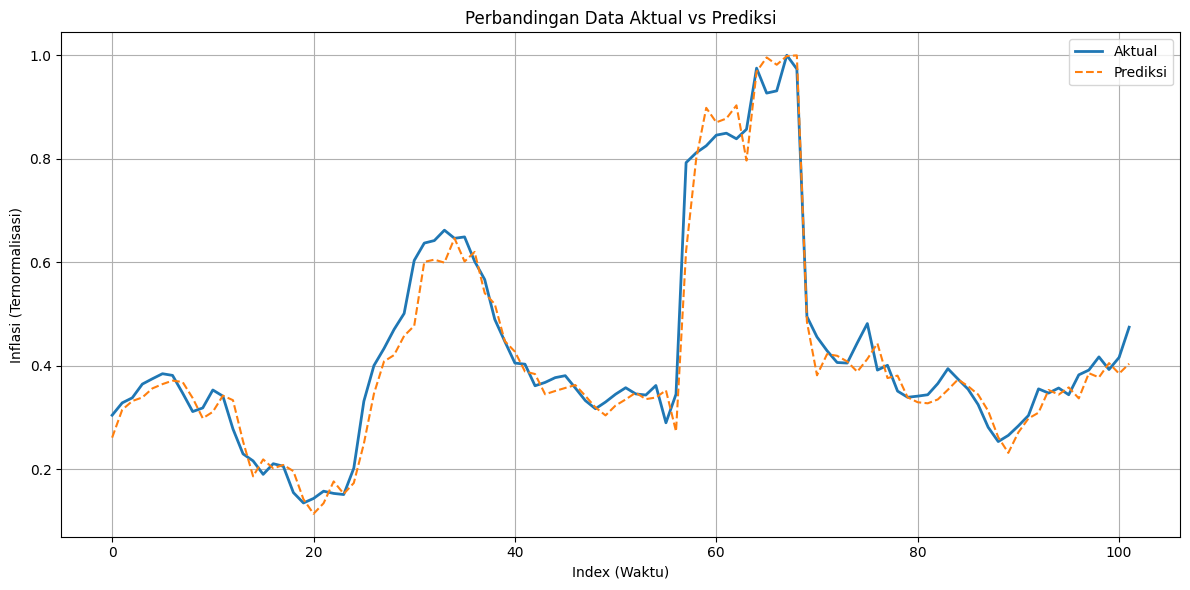

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Aktual', linewidth=2)
plt.plot(y_pred, label='Prediksi', linestyle='--')
plt.title('Perbandingan Data Aktual vs Prediksi')
plt.xlabel('Index (Waktu)')
plt.ylabel('Inflasi (Ternormalisasi)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# === Prediksi 12 bulan ke depan ===
n_future = 12
predictions_future = []

# Gunakan urutan terakhir dari data untuk prediksi beruntun
last_seq = data_scaled[-seq_len:]
current_seq = last_seq.copy()

for _ in range(n_future):
    input_seq = current_seq.reshape((1, seq_len, 1))
    next_pred = model.predict(input_seq, verbose=0)[0, 0]
    predictions_future.append(next_pred)
    current_seq = np.append(current_seq[1:], next_pred)

In [17]:
# === Gabungkan untuk plotting ===
full_series = np.concatenate([
    y_train.flatten(),
    y_test.flatten(),
    np.array(predictions_future).flatten()
])

In [18]:
train_range = range(seq_len, seq_len + len(y_train))
test_range = range(seq_len + len(y_train), seq_len + len(y_train) + len(y_test))
future_range = range(seq_len + len(y_train) + len(y_test), seq_len + len(y_train) + len(y_test) + n_future)

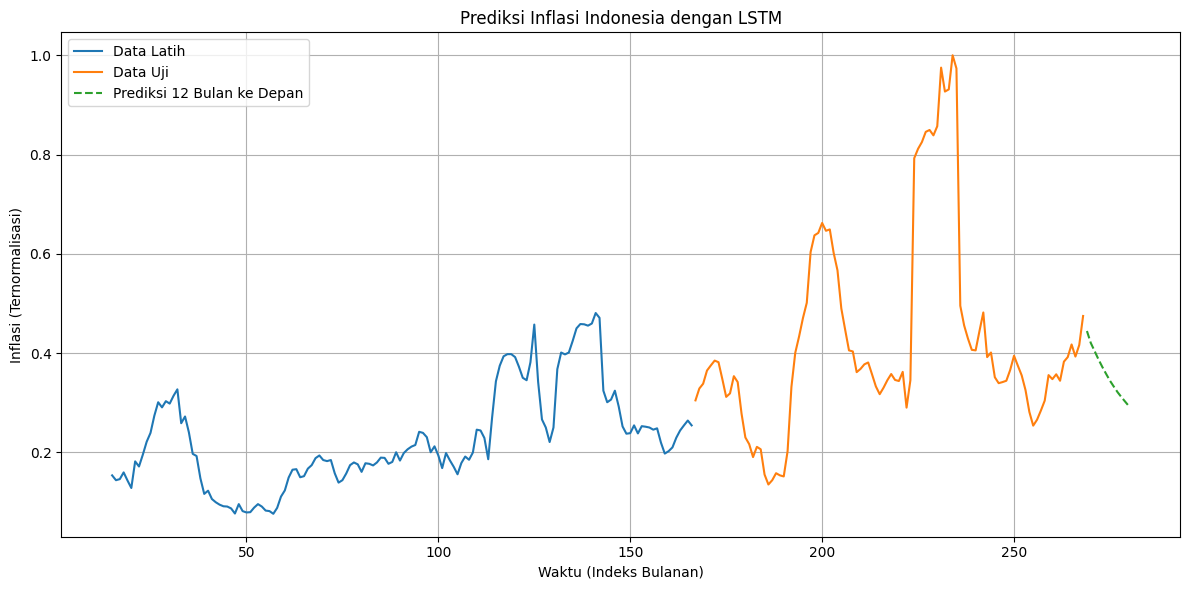

In [19]:
# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(train_range, y_train.flatten(), label="Data Latih")
plt.plot(test_range, y_test.flatten(), label="Data Uji")
plt.plot(future_range, np.array(predictions_future).flatten(), label="Prediksi 12 Bulan ke Depan", linestyle='--')
plt.title("Prediksi Inflasi Indonesia dengan LSTM")
plt.xlabel("Waktu (Indeks Bulanan)")
plt.ylabel("Inflasi (Ternormalisasi)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
model.save("model_inflasi.h5")